# Project 2:  Holiday weather

by Jake Stokes, 2nd of July 2016.

This is the project for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

The purpose of the project is to examine historic weather data from the Weather Underground for London to try to predict the best dates this year to take a nice warm staycation. My aim will be to:
- obtain weather data for the year of 2015
- clean the obtained data
- run some basic data analysis techniques on the data set to:
- find two weeks with the highest mean temperature; and,
- avoid precipitation where possible.

The weather may of course may be very different this year to the weather of 2015, but it should give me some indication of when would be a good time to take a break.

## Getting the data

The weather data was obtained from the [Weather Underground](https://www.wunderground.com/history) website, using the dates 1st Jan 2015 til 31st Dec 2015, and saved as 'London_2015.csv'.

To obtain the data you must first enter London, United Kingdom as the location, and hit submit. On the following page there are some tabs - select 'custom', and from here you can enter the dates. The option to see the data in a CSV format is at the very bottom of the page underneath the data. This can be right-click-saved, and renamed from a .html to a .csv ready for use.

If you haven't the 'London_2014.csv' file, you can obtain the data as follows. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'London' in the 'Location' input box and when the pop up menu comes up with the option 'London, United Kingdom' select it and then click on 'Submit'. 

Once ready, as shown below, I have loaded the dataframe, ensuing that any extra spaces at the start of values are removed. I have also imported the whole pandas module for data analytics.

In [18]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
london = read_csv('London_2015.csv', skipinitialspace=True)

## Cleaning the data

First I will display some of the data to see if there are any obvious issues.

First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [19]:
london.head()

GMT  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0  2015-1-1                12                  8                 4   
1  2015-1-2                11                  7                 4   
2  2015-1-3                 6                  4                 2   
3  2015-1-4                 3                  1                -2   
4  2015-1-5                10                  6                 2   

   Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity  Mean Humidity  \
0          11               7              3            94             88   
1          12               4              0            94             70   
2           6               3              1           100             91   
3           3               1             -2           100             97   
4           8               5              2           100             86   

   Min Humidity          ...           Max VisibilityKm  Mean VisibilityKm  \
0            78          ...                         18                  9   
1            41          ...                         31                 16   
2            70          ...                         31                 10   
3            90          ...                         13                  4   
4            67          ...                         31                 10   

   Min VisibilitykM  Max Wind SpeedKm/h  Mean Wind SpeedKm/h  \
0                 5                  39                   21   
1                 3                  35                   24   
2                 2                  19                   10   
3                 0                  13                    6   
4                 3                  19                   10   

   Max Gust SpeedKm/h  Precipitationmm  CloudCover  Events  \
0                  60             0.51           7    Rain   
1                  50             0.00           2    Rain   
2                 NaN             7.11           5    Rain   
3                  27             0.00           6     Fog   
4                 NaN             0.25           6     NaN   

   WindDirDegrees<br />  
0             209<br />  
1             258<br />  
2              19<br />  
3             225<br />  
4             199<br />  

[5 rows x 23 columns]

There are some immediately obvious issues with the data:
- the final column: 'WindDirDegrees`<br />`' and its contents have retained the html *line breaks* on the end of the data line
- this means that the final column will be an object dtype as opposed to int64 as intended (as shown below)
- the GMT column has the dtype 'object' as opposed to 'datetime' (as shown below)
- there are various NaN values in the results

In [20]:
london.dtypes

GMT                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees<br />           object
dtype: object

First I will rename the column to remove the html *line breaks*:

In [21]:
london = london.rename(columns = {'WindDirDegrees<br />' : 'WindDirDegrees'})

This next one is me just being anal about the title format for continuity.

In [22]:
london = london.rename(columns = {'Min VisibilitykM' : 'Min VisibilityKm'})

Now to remove the `<br />` html *line breaks* from the values in the `'WindDirDegrees'` column:

In [23]:
london['WindDirDegrees'] = london['WindDirDegrees'].str.rstrip('<br />')

Here I change the values in the `'WindDirDegrees'` column to the `int64` dtype:

In [24]:
london['WindDirDegrees'] = london['WindDirDegrees'].astype('int64')   

Finally, I change the values in the `'GMT'` column to the `datetime64` dtype:

In [25]:
london['GMT'] = to_datetime(london['GMT'])

I also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs:

In [26]:
london.index = london['GMT']

Now I need to address the `'NaN'` values in the data and then decide what to do with them. The intentions for this project are to use the 'Mean TemperatureC' and 'Precipitationmm' column values to establish the best dates for the staycation, so first I will check if here are any NaN values in these columns:

In [27]:
meanTempNaN = len(london[london['Mean TemperatureC'].isnull()])
precipitationmm = len(london[london['Precipitationmm'].isnull()])
print ("The number of NaN values in the mean temperature column and the precipitation column\
 are %d and %d respectively." % (meanTempNaN, precipitationmm))

The number of NaN values in the mean temperature column and the precipitation column are 0 and 0 respectively.


Considering that there are no NaN values in the data I will actually be utilising for this project, I am able to ignore the NaN values in the dataframe for this project.

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. I'm in the northern hemisphere, so I'm going to create a dataframe that holds just those months, and starting from tomorrow's date (today is July 2nd 2016):

In [28]:
remainingSummer = london.ix[datetime(2015,7,3) : datetime(2015,8,31)]

I now look for the days with warm temperatures.

In [29]:
remainingSummer[remainingSummer['Mean TemperatureC'] >= 20]

GMT  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
GMT                                                                            
2015-07-03 2015-07-03                27                 20                13   
2015-07-04 2015-07-04                27                 22                17   
2015-07-10 2015-07-10                27                 20                13   
2015-07-11 2015-07-11                26                 20                14   
2015-07-14 2015-07-14                23                 20                17   
2015-07-16 2015-07-16                25                 20                14   
2015-07-17 2015-07-17                25                 20                14   
2015-08-03 2015-08-03                25                 20                16   
2015-08-08 2015-08-08                26                 20                14   
2015-08-21 2015-08-21                26                 22                17   
2015-08-22 2015-08-22                31                 23                15   

            Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity  \
GMT                                                                   
2015-07-03          15              11              8            83   
2015-07-04          18              14             10           100   
2015-07-10          11               7              2            82   
2015-07-11          14              10              8            77   
2015-07-14          18              15             14           100   
2015-07-16          15              13              9            88   
2015-07-17          17              13              9            94   
2015-08-03          16              13              8            83   
2015-08-08          15              13             10            94   
2015-08-21          17              16             13            88   
2015-08-22          17              14             12            94   

            Mean Humidity  Min Humidity       ...        Max VisibilityKm  \
GMT                                           ...                           
2015-07-03             56            23       ...                      31   
2015-07-04             67            33       ...                      31   
2015-07-10             45            11       ...                      31   
2015-07-11             49            24       ...                      31   
2015-07-14             78            51       ...                      31   
2015-07-16             65            44       ...                      26   
2015-07-17             67            35       ...                      23   
2015-08-03             64            40       ...                      31   
2015-08-08             62            28       ...                      31   
2015-08-21             70            39       ...                      31   
2015-08-22             63            27       ...                      31   

            Mean VisibilityKm  Min VisibilityKm  Max Wind SpeedKm/h  \
GMT                                                                   
2015-07-03                 21                 9                  27   
2015-07-04                  8                 2                  27   
2015-07-10                 23                10                  23   
2015-07-11                 19                10                  27   
2015-07-14                 13                 3                  24   
2015-07-16                 14                 6                  24   
2015-07-17                 11                 6                  35   
2015-08-03                 14                10                  34   
2015-08-08                 15                10                  23   
2015-08-21                 13                10                  26   
2015-08-22                 16                 7                  26   

            Mean Wind SpeedKm/h  Max Gust SpeedKm/h  Precipitationmm  \
GMT                                                    

##### Summer 2015 had a toal of 11 days with a mean temperature of 20 Celsius or higher.

From here it would be best to see a graph of the temperature for a better look at the trends in temperature, so next I tell Jupyter to display any graph created inside this notebook:

In [30]:
%matplotlib inline

Now to plot the `'Mean TemperatureC'` for the Summer:

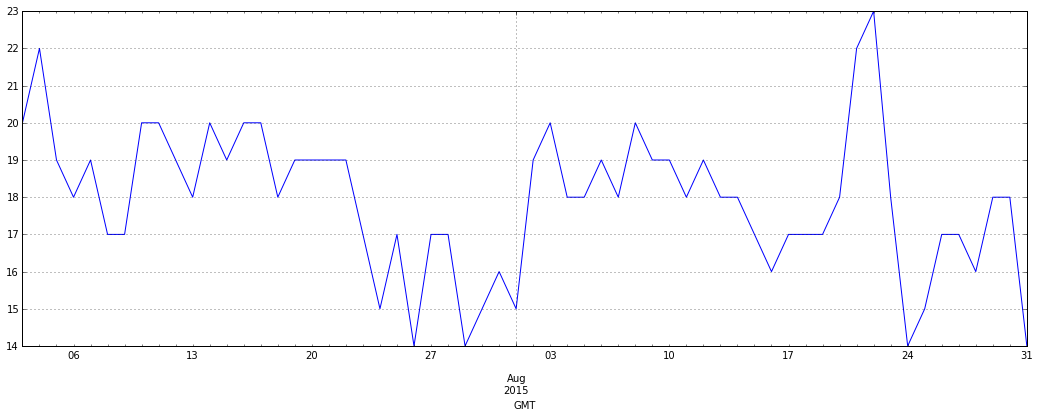

In [31]:
remainingSummer['Mean TemperatureC'].plot(grid=True, figsize=(18,6))

The graph shows that the mean temperature was generally in the 18ºC to 20ºC range, with the exceptions of the final weeks of both July and August.

To get a better idea of when would be best for a staycation I will also put precipitation onto the graph:

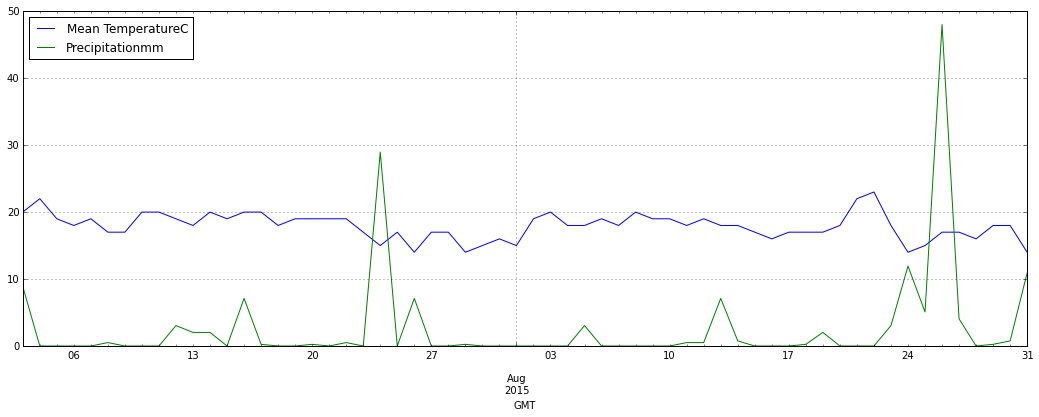

In [32]:
remainingSummer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(18,6))

It seems that there were days of high precipitation in the last week of both July and August.
Both months seem very similar on face value, so for the best chance an enjoyable staycation, I will look at the mean of the 'mean temperatureC' for each month to see if there is statistically better option:

In [33]:
july = remainingSummer.ix[datetime(2015,7,1) : datetime(2015,7,31)]
august = remainingSummer.ix[datetime(2015,8,1) : datetime(2015,8,31)]
julyTempMean = float(july[['Mean TemperatureC']].values.mean())
augTempMean = float(august[['Mean TemperatureC']].values.mean())
MeanTemperatures = "Mean temperature for July : %0.1fºC\nMean temperature for August: %0.1fºC" % (julyTempMean, augTempMean)
print (MeanTemperatures)

Mean temperature for July : 18.1ºC
Mean temperature for August: 17.8ºC


With the mean temperatures for each month varying by only 0.3ºC, not a noticable difference; I have decided to also examine the mean precipitation of both months to see if the result makes a particular month a clearer best choice:

In [34]:
julyPrecipMean = float(july[['Precipitationmm']].values.mean())
augPrecipMean = float(august[['Precipitationmm']].values.mean())
MeanPrecipitation = "Mean precipitation for July : %0.1fmm\nMean precipitation for August: %0.1fmm" % (julyPrecipMean, augPrecipMean)
print (MeanPrecipitation)

Mean precipitation for July : 2.1mm
Mean precipitation for August: 3.2mm


July had 0.9mm less precipitation on average per day than August.

## Conclusions

The graphs have shown both July and August both had very similar weather throughout the month. Ultimately, July had both a higher average mean temperature across the month, and a lower precipitation level, so I will take my 2 week staycation this month, starting immediately! (That way I can get more practice with Python)

Of course these results are no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction I would need to analyse the summers for many more years. I am currently studying to expand my skills to be able to achieve this in future projects.